<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod3_lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import date
import seaborn as sns
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def to_color(ax, fontsize: int, color: str):
  for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(color)

In [4]:
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

In [5]:
url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=";", parse_dates=[4])
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


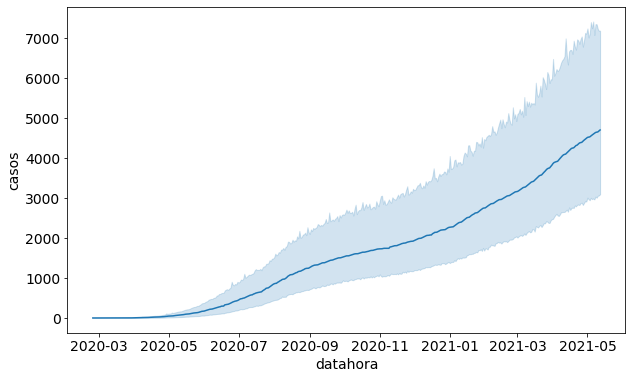

In [6]:
sns.lineplot(data=dados, x='datahora', y='casos')

Crescimento exponencial
$$e^x$$

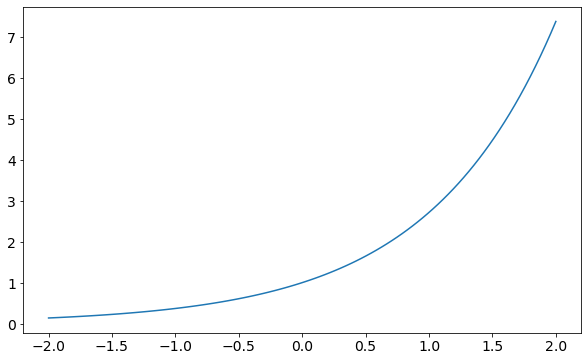

In [7]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)
sns.lineplot(x=eixo_x, y=y_exp)

$$log_2 2 = 1$$
$$log_2 2^x = x$$
$$log_e e^x = x$$

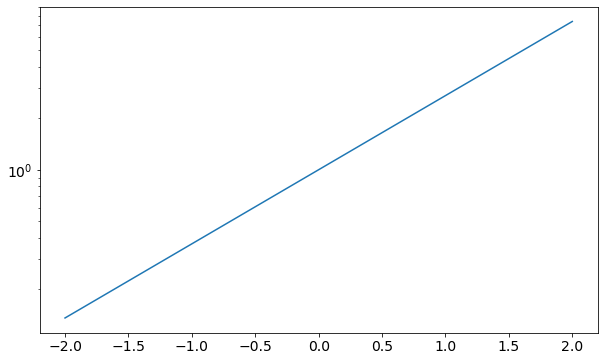

In [8]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

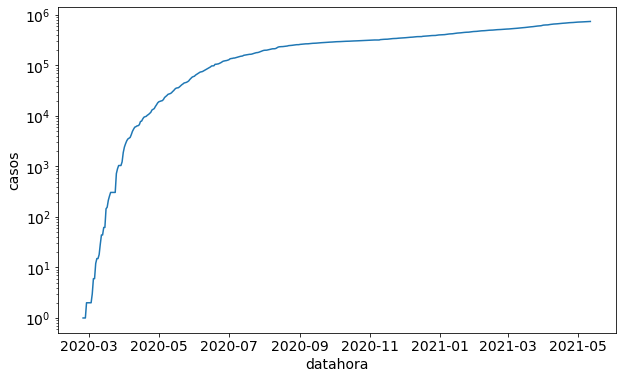

In [9]:
dados_sp = dados.query("nome_munic == 'São Paulo'")
sns.lineplot(data=dados_sp, x='datahora', y='casos')
mpl.pyplot.yscale('log')

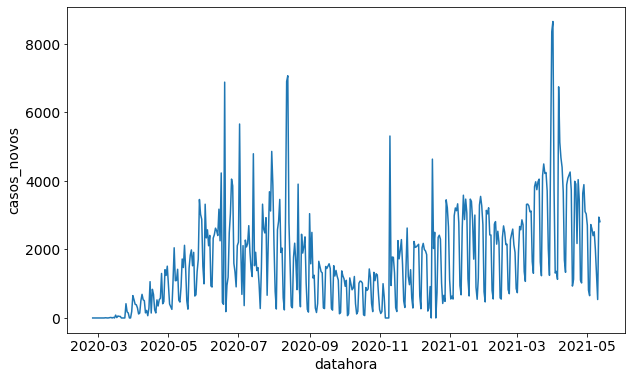

In [10]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')

In [11]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))
dados_exemplo['diferenciado'] = dados_exemplo.diff()

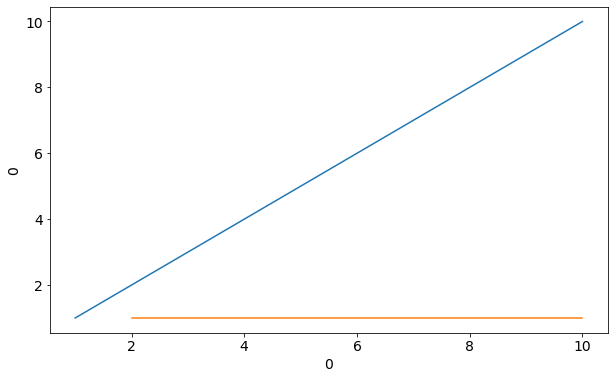

In [12]:
sns.lineplot(data=dados_exemplo, x=0, y=0)
sns.lineplot(data=dados_exemplo, x=0, y='diferenciado')

In [13]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


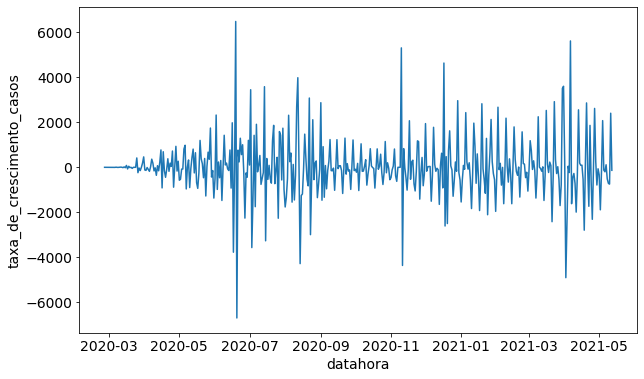

In [14]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos')
# sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

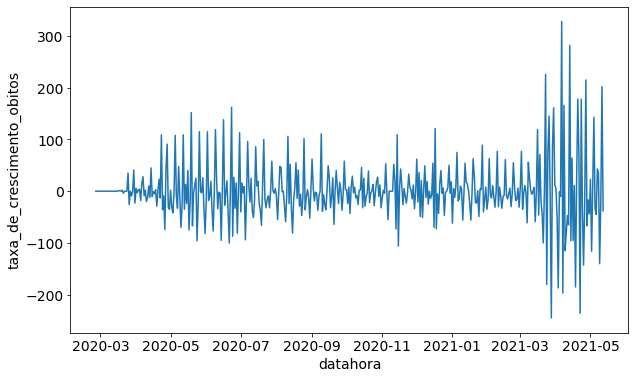

In [15]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

<BarContainer object of 443 artists>

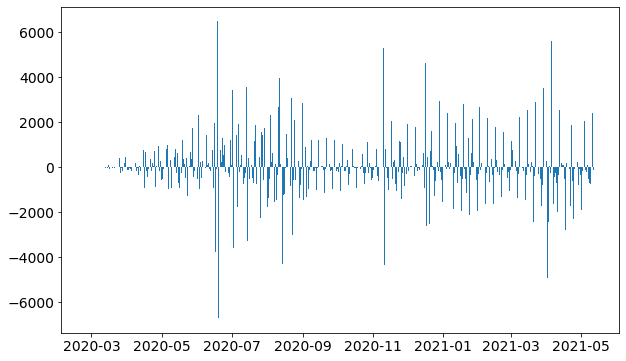

In [16]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [17]:
# dados_sp['ano'] = dados_sp['datahora'].dt.year
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
dados_2021 = dados_sp.query("ano == 2021")
dados_2021.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


<BarContainer object of 132 artists>

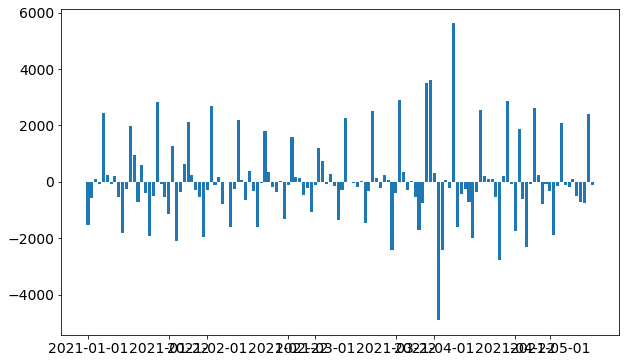

In [19]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [20]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


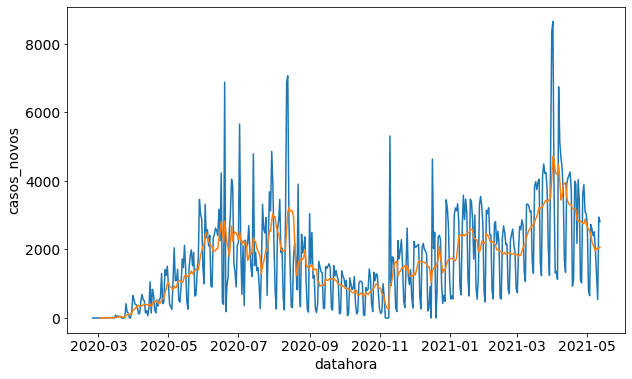

In [21]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

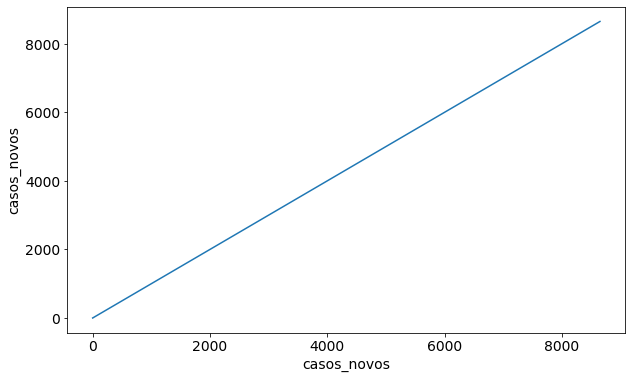

In [22]:
sns.lineplot(data=dados_sp, x='casos_novos', y='casos_novos')

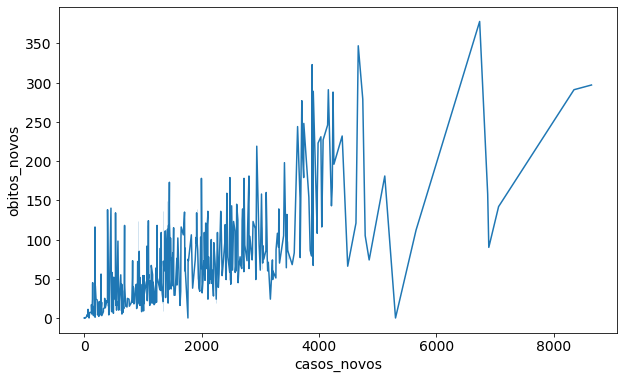

In [23]:
sns.lineplot(data=dados_sp, x='casos_novos', y='obitos_novos')

In [24]:
dados_202101 = dados_sp.query("ano == 2021 and mes==1")
dados_202102 = dados_sp.query("ano == 2021 and mes==2")

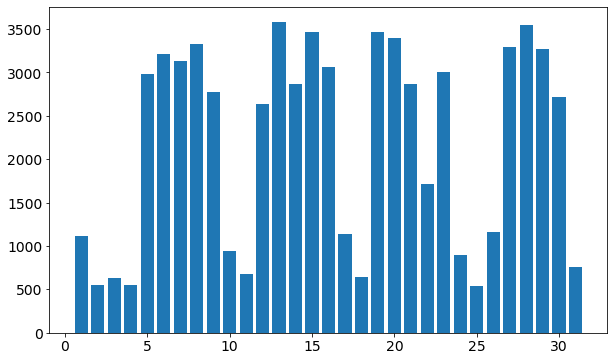

<BarContainer object of 28 artists>

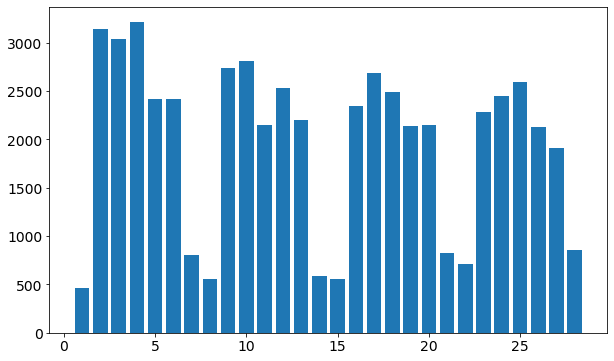

In [25]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])

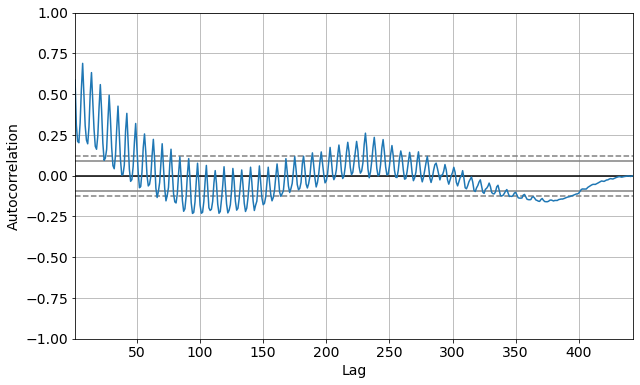

In [26]:
autocorrelation_plot(dados_sp['casos_novos'])

In [27]:
dados_sp.shape

(443, 31)

In [28]:
aleatorio = np.random.rand(443)

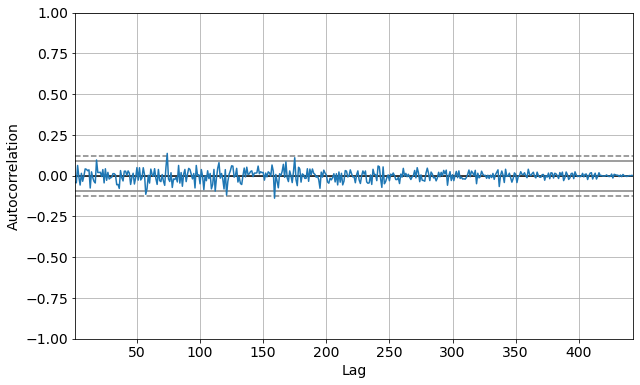

In [29]:
autocorrelation_plot(aleatorio)

# Desafios
Desafio 01: Um notebook sem warnings

Desafio 03: Fazer melhorias nos gráficos.

## Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

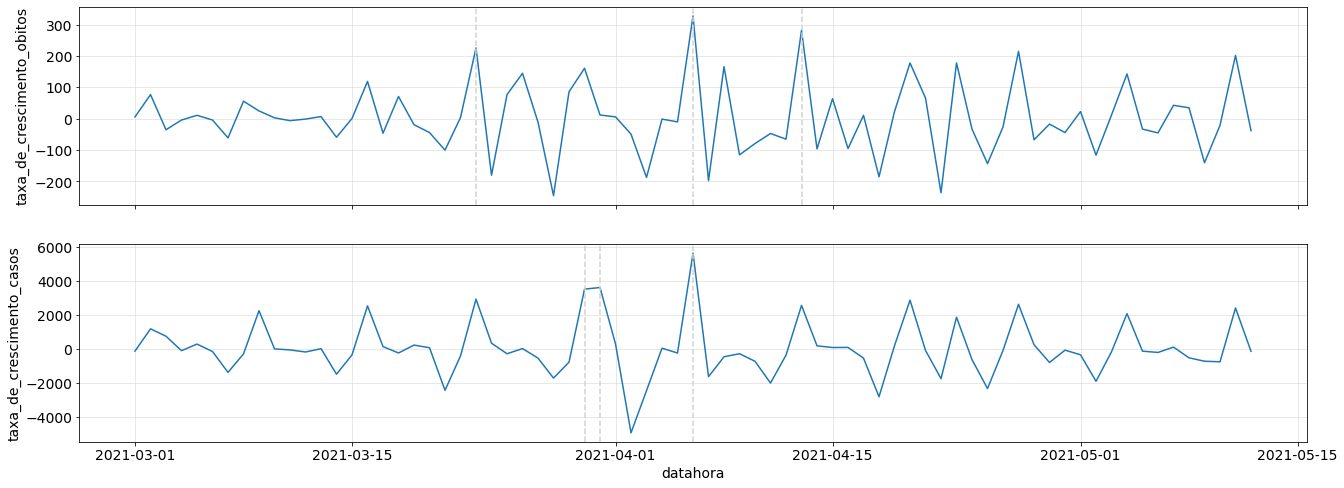

In [30]:
df = dados_sp.query("datahora >= '2021-03-01'").reset_index()[['datahora', 'taxa_de_crescimento_casos', 'taxa_de_crescimento_obitos', 'semana_epidem']]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(22,8))
sns.lineplot(data=df, x='datahora', y='taxa_de_crescimento_obitos', ax=ax1)
sns.lineplot(data=df, x='datahora', y='taxa_de_crescimento_casos', ax=ax2)

columns = ['taxa_de_crescimento_obitos', 'taxa_de_crescimento_casos']
indexes = []
for c in columns:
  indexes.append(df.iloc[df[c].sort_values(ascending=False).index[:3]]['datahora'])
col = 0
for ax in fig.axes:
  plt.sca(ax)
  plt.grid(color = 'lightgrey', linewidth = 0.5)
  for line in indexes[col]:
    plt.axvline(x=line, color='lightgrey', linestyle='--')
  col = col + 1

Embora o pico máximo esteja alinhado, os demais valores não se alinham.

## Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

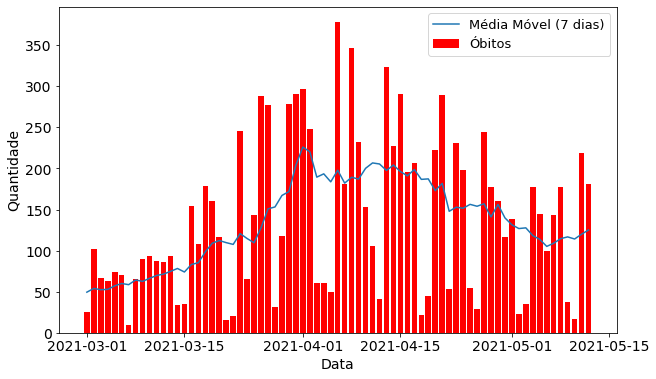

In [31]:
df = dados_sp.query("datahora >= '2021-03-01'").reset_index()
plt.bar(df['datahora'], df['obitos_novos'], color='red')
ax = sns.lineplot(data=df, x='datahora', y='media_movel_obitos')
plt.legend(['Média Móvel (7 dias)','Óbitos'], fontsize='13')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Data')
plt.show()

## Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

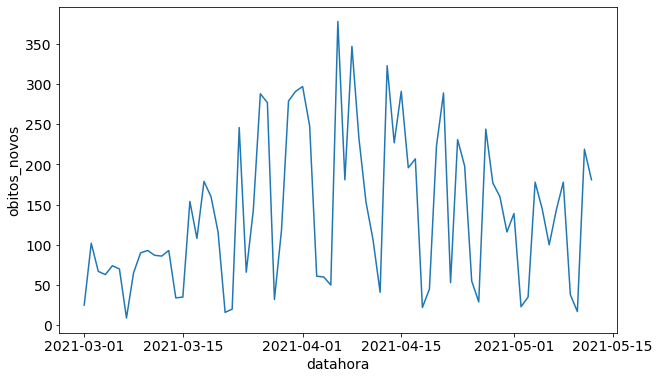

In [32]:
sns.lineplot(data=df, x='datahora', y='obitos_novos')

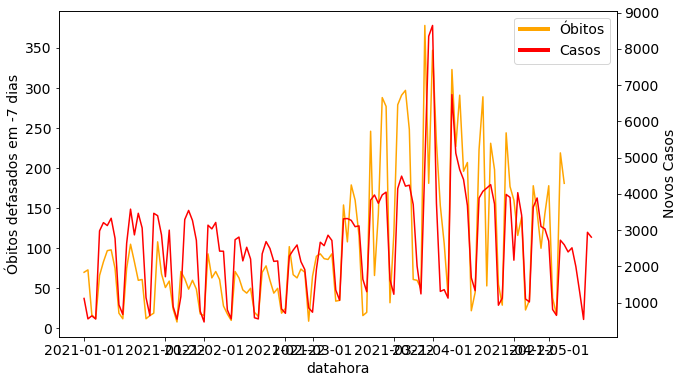

In [33]:
df = dados_sp.query("datahora >= '2021-01-01'").reset_index()
shift = -7
df['obitos_shift'] = df['obitos_novos'].shift(shift)
ax1 = sns.lineplot(data=df, x='datahora', y='obitos_shift', color='orange')
ax2 = plt.twinx()
sns.lineplot(data=df, x='datahora', y='casos_novos', color='red', ax=ax2)
ax1.set_ylabel(f"Óbitos defasados em {shift} dias")
ax2.set_ylabel("Novos Casos")
plt.legend(['Média Móvel Óbitos','Média Móvel Casos'], fontsize='13')
handles = [Line2D([0], [0], color='orange', lw=4),
           Line2D([0], [0], color='red', lw=4)]
plt.legend(handles, ['Óbitos','Casos'], fontsize='14')
# ax1.set_ylim(0,9000)
# ax2.set_ylim(0,9000)

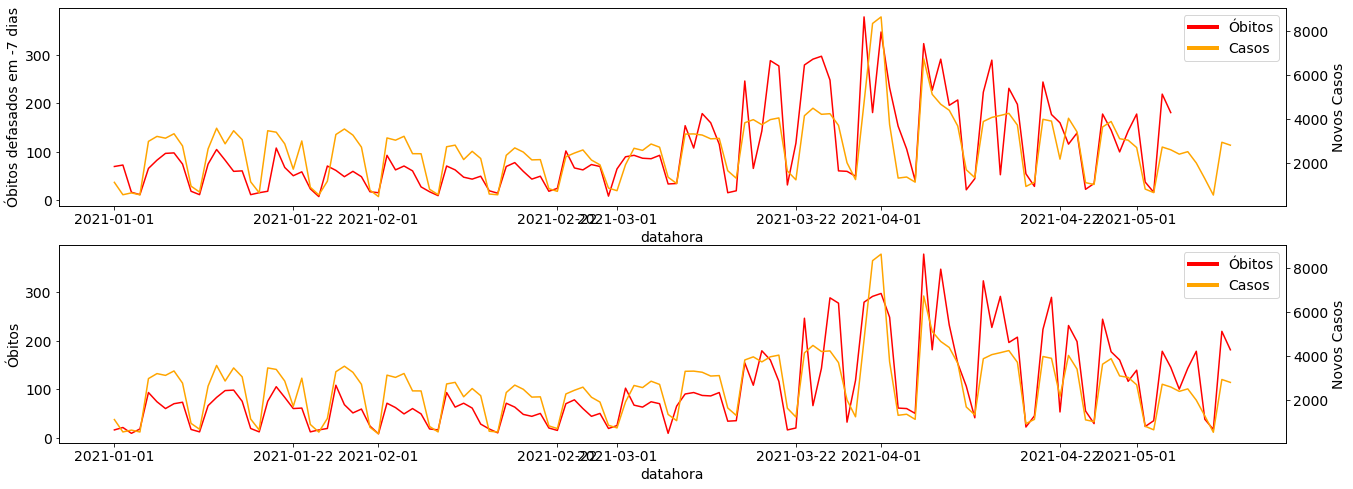

In [34]:
shift = -7
df = dados_sp.query("datahora >= '2021-01-01'").reset_index()
df['obitos_shift'] = df['obitos_novos'].shift(shift)

fig, (ax11, ax21) = plt.subplots(nrows=2, ncols=1, figsize=(22,8))
ax12 = ax11.twinx()
ax22 = ax21.twinx()

sns.lineplot(data=df, x='datahora', y='obitos_shift', color='red', ax=ax11)
sns.lineplot(data=df, x='datahora', y='casos_novos', color='orange', ax=ax12)
ax11.set_ylabel(f"Óbitos defasados em {shift} dias")
ax12.set_ylabel("Novos Casos")
ax11.legend(['Média Móvel Óbitos','Média Móvel Casos'], fontsize='13')
handles = [Line2D([0], [0], color='red', lw=4),
           Line2D([0], [0], color='orange', lw=4)]
ax11.legend(handles, ['Óbitos','Casos'], fontsize='14')

sns.lineplot(data=df, x='datahora', y='obitos_novos', color='red', ax=ax21)
sns.lineplot(data=df, x='datahora', y='casos_novos', color='orange', ax=ax22)
ax21.set_ylabel(f"Óbitos")
ax22.set_ylabel("Novos Casos")
ax21.legend(['Média Móvel Óbitos','Média Móvel Casos'], fontsize='13')
handles = [Line2D([0], [0], color='red', lw=4),
           Line2D([0], [0], color='orange', lw=4)]
ax21.legend(handles, ['Óbitos','Casos'], fontsize='14')


Com 7 dias de atraso, os obitos parecem serem mais proporcionais

## Desafio 06: Função de correlação cruzada dos óbitos e casos.

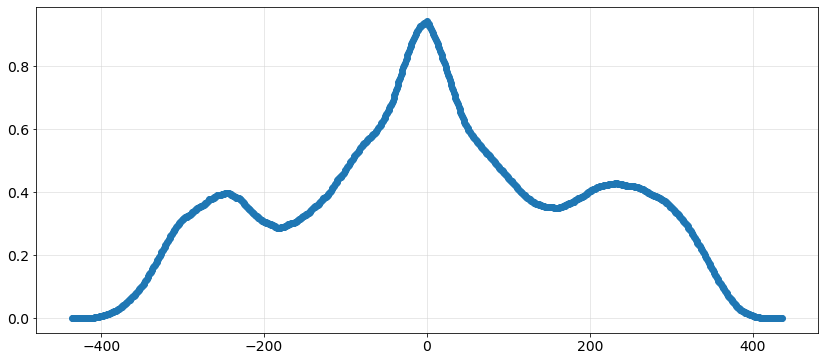

In [42]:
df = dados_sp[dados_sp['media_movel_casos'].notna()].reset_index()

fig = plt.figure(figsize=(14,6))
plt.xcorr(x=df['media_movel_casos'], y=df['media_movel_obitos'], maxlags=None, usevlines=False)
plt.grid(color = 'lightgrey', linewidth = 0.5)
plt.show()

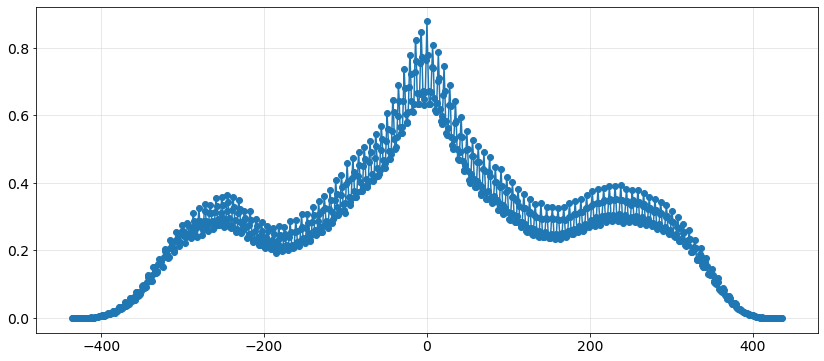

In [49]:
fig = plt.figure(figsize=(14,6))
plt.xcorr(x=df['casos_novos'].astype(float), y=df['obitos_novos'].astype(float), maxlags=None, usevlines=False, linestyle='-')
plt.grid(color = 'lightgrey', linewidth = 0.5)
plt.show()

O resultado da correlação indica que 0 lag é o cenário ideal

## Desafio 07: Estudar outros municípios.

In [56]:
dados_cps = dados.query("nome_munic == 'Campinas'")
dados_cps['taxa_de_crescimento_casos'] = dados_cps['casos_novos'].diff()
dados_cps['taxa_de_crescimento_obitos'] = dados_cps['obitos_novos'].diff()
dados_cps['media_movel_casos'] = dados_cps['casos_novos'].rolling(window=7, center=False).mean()
dados_cps['media_movel_obitos'] = dados_cps['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

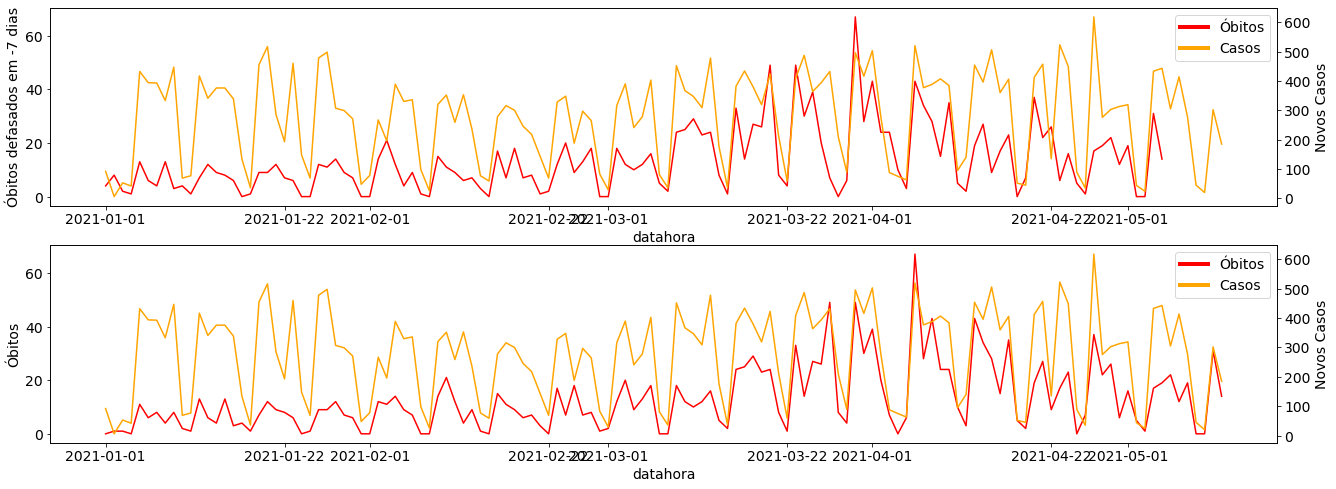

In [53]:
shift = -7
df = dados_cps.query("datahora >= '2021-01-01'").reset_index()
df['obitos_shift'] = df['obitos_novos'].shift(shift)

fig, (ax11, ax21) = plt.subplots(nrows=2, ncols=1, figsize=(22,8))
ax12 = ax11.twinx()
ax22 = ax21.twinx()

sns.lineplot(data=df, x='datahora', y='obitos_shift', color='red', ax=ax11)
sns.lineplot(data=df, x='datahora', y='casos_novos', color='orange', ax=ax12)
ax11.set_ylabel(f"Óbitos defasados em {shift} dias")
ax12.set_ylabel("Novos Casos")
ax11.legend(['Média Móvel Óbitos','Média Móvel Casos'], fontsize='13')
handles = [Line2D([0], [0], color='red', lw=4),
           Line2D([0], [0], color='orange', lw=4)]
ax11.legend(handles, ['Óbitos','Casos'], fontsize='14')

sns.lineplot(data=df, x='datahora', y='obitos_novos', color='red', ax=ax21)
sns.lineplot(data=df, x='datahora', y='casos_novos', color='orange', ax=ax22)
ax21.set_ylabel(f"Óbitos")
ax22.set_ylabel("Novos Casos")
ax21.legend(['Média Móvel Óbitos','Média Móvel Casos'], fontsize='13')
handles = [Line2D([0], [0], color='red', lw=4),
           Line2D([0], [0], color='orange', lw=4)]
ax21.legend(handles, ['Óbitos','Casos'], fontsize='14')

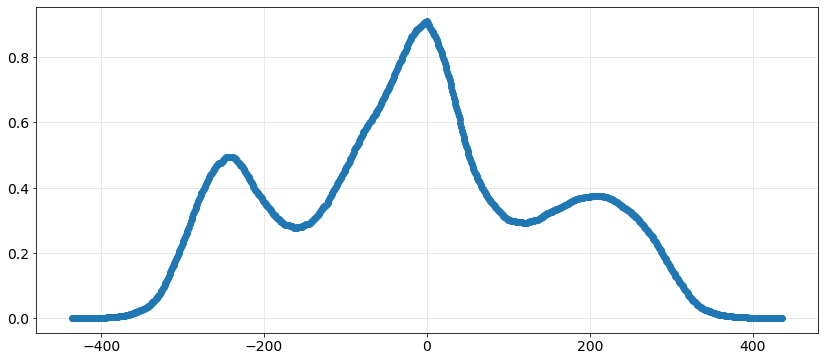

In [57]:
df = dados_cps[dados_cps['media_movel_casos'].notna()].reset_index()

fig = plt.figure(figsize=(14,6))
plt.xcorr(x=df['media_movel_casos'], y=df['media_movel_obitos'], maxlags=None, usevlines=False)
plt.grid(color = 'lightgrey', linewidth = 0.5)
plt.show()

Em relação a São Paulo, a calda do lag é invertida. O que isso significa?